Importing libraries and functions

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler



Loading dataset

In [ ]:
dataset = pd.read_excel('\credit-scoring\data\raw\data.xlsx')

Exploratory Data Analysis

Data Preparation

In [94]:
#print the number of rows and columns in the dataset
dataset.shape

(3000, 30)

In [95]:
#print the first five rows of the dataset
dataset.head()

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,TLCnt03,TLCnt12,TLCnt24,TLCnt,TLSum,TLMaxSum,TLSatCnt,TLDel60Cnt,TLBadCnt24,TL75UtilCnt,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1,582,3,3,0,4,0.0,5,117,27,0,0,0,5.0,19410.0,21147.0,16.0,2,1,3.0,3.0,0.9179,0.2083,2,3,7,0.2083,4,4,0.0000
1,1,662,15,9,0,3,1.0,3,14,14,0,0,1,1.0,16776.0,20971.0,1.0,0,0,1.0,1.0,0.8000,0.0000,0,0,0,1.0000,12,0,1.0000
2,1,805,0,0,0,1,5.0,1,354,7,0,2,10,19.0,16903.0,47593.0,21.0,1,1,4.0,5.0,0.3552,0.6538,0,1,1,0.7308,1,1,0.5263
3,1,1175,8,5,0,6,1.0,10,16,4,0,2,4,3.0,18339.0,20093.0,1.0,1,0,2.0,3.0,0.9127,0.2500,1,1,1,0.7500,7,1,1.3333
4,1,1373,3,1,0,9,0.0,8,130,52,0,0,0,1.0,2327.0,1860.0,3.0,4,1,1.0,1.0,1.2511,0.0000,0,1,4,0.1429,3,1,0.0000


In [96]:
#print the last five rows of the dataset
dataset.tail()

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,TLCnt03,TLCnt12,TLCnt24,TLCnt,TLSum,TLMaxSum,TLSatCnt,TLDel60Cnt,TLBadCnt24,TL75UtilCnt,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
2995,0,126441,0,0,0,2,0.0,2,199,10,0,1,6,17.0,48759.0,62088.0,25.0,0,0,7.0,9.0,0.7853,0.6923,0,0,0,0.6538,0,0,0.3529
2996,0,126448,0,0,0,0,NaN,0,270,3,1,2,5,12.0,20378.0,35341.0,13.0,0,0,5.0,5.0,0.5766,0.9286,0,0,0,0.8571,0,0,0.4167
2997,0,126465,1,1,0,8,0.0,5,234,4,0,5,9,12.0,127559.0,146252.0,26.0,0,0,7.0,9.0,0.8722,0.6071,0,0,0,0.4286,1,0,0.7500
2998,0,126487,4,4,0,2,3.0,1,257,3,1,2,3,3.0,4629.0,4455.0,4.0,1,1,3.0,3.0,1.0391,0.6000,0,1,2,0.6000,4,1,1.0000
2999,0,126503,2,1,1,0,18.0,0,254,119,0,0,0,3.0,641.0,1979.0,2.0,4,2,0.0,1.0,0.3239,0.1667,0,2,4,0.5000,3,2,0.0000


In [97]:
#checking statistical measures of data
dataset.describe()

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,TLCnt03,TLCnt12,TLCnt24,TLCnt,TLSum,TLMaxSum,TLSatCnt,TLDel60Cnt,TLBadCnt24,TL75UtilCnt,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,2812.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,2997.000000,2960.000000,2960.000000,2996.000000,3000.000000,3000.000000,2901.000000,2901.000000,2959.000000,2996.000000,3000.000000,3000.000000,3000.000000,2997.000000,3000.000000,3000.000000,2997.000000
mean,0.166667,62922.683667,1.430000,0.857000,0.153333,3.108333,3.108108,3.555000,170.113667,11.873667,0.275000,1.821333,3.882333,7.879546,20151.095608,31205.900676,13.511682,1.522000,0.567000,3.121682,4.077904,0.648178,0.518331,0.726000,0.814667,2.522000,0.496168,1.409000,1.068333,0.564219
std,0.372740,37203.691912,2.731469,2.161352,0.360369,3.479171,4.637831,4.477536,92.813700,16.321412,0.582084,1.925265,3.396714,5.421595,19682.086262,29092.908099,8.931769,2.809653,1.324423,2.605435,3.108076,0.266486,0.234759,1.163633,1.609508,3.407255,0.206722,2.460434,1.806124,0.480105
min,0.000000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30376.500000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,106.000000,4.000000,0.000000,0.000000,1.000000,4.000000,5699.750000,10236.000000,6.000000,0.000000,0.000000,1.000000,2.000000,0.501100,0.352900,0.000000,0.000000,0.000000,0.344800,0.000000,0.000000,0.250000
50%,0.000000,62872.500000,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000,151.000000,7.000000,0.000000,1.000000,3.000000,7.000000,15546.500000,24188.500000,12.000000,0.000000,0.000000,3.000000,3.000000,0.695500,0.527050,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.500000
75%,0.000000,96156.500000,2.000000,1.000000,0.000000,4.000000,3.000000,5.000000,227.000000,13.000000,0.000000,3.000000,6.000000,11.000000,28303.250000,44756.250000,19.000000,2.000000,1.000000,4.000000,6.000000,0.840650,0.681800,2.000000,1.000000,4.000000,0.625000,2.000000,1.000000,0.800000
max,1.000000,126503.000000,51.000000,50.000000,1.000000,40.000000,24.000000,48.000000,933.000000,342.000000,7.000000,15.000000,28.000000,40.000000,210612.000000,271036.000000,57.000000,38.000000,16.000000,20.000000,23.000000,3.361300,1.000000,8.000000,19.000000,45.000000,1.000000,47.000000,20.000000,6.000000


In [98]:
#dropping id column from the dataset because it isn't needed for analysis or model building.
dataset = dataset.drop('ID', axis=1)
dataset.shape

(3000, 29)

In [100]:
#checking for missing values
dataset.isna().sum()

,0
TARGET,0
DerogCnt,0
CollectCnt,0
BanruptcyInd,0
InqCnt06,0
InqTimeLast,188
InqFinanceCnt24,0
TLTimeFirst,0
TLTimeLast,0
TLCnt03,0


In [101]:
#fill missing values with mean
dataset = dataset.fillna(dataset.mean())

In [102]:
#cross-check for missing values
dataset.isna().sum()

,0
TARGET,0
DerogCnt,0
CollectCnt,0
BanruptcyInd,0
InqCnt06,0
InqTimeLast,0
InqFinanceCnt24,0
TLTimeFirst,0
TLTimeLast,0
TLCnt03,0


In [ ]:
#exporting the cleaned data to a new file
dataset.to_csv("\credit-scoring\data\processed\cleaned_data.xlsx", sep=',' , encoding = 'UTF-8')

In [103]:
#checking the distribution of TARGET variable
dataset['TARGET'].value_counts()

,count
TARGET,
0,2500
1,500


0 --> Good Loans

1 --> Bad Loans

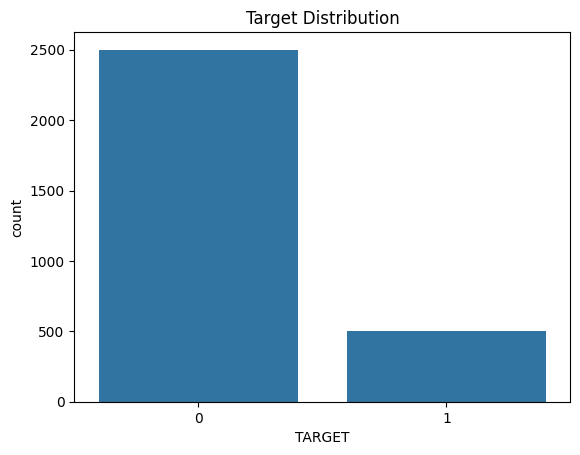

In [116]:
# Plotting target distribution
sns.countplot(x='TARGET', data=dataset)
plt.title("Target Distribution")
plt.show()

In [104]:
#data summary(mean) across good loans(0) and bad loans(1)
dataset.groupby('TARGET').mean()

,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,TLCnt03,TLCnt12,TLCnt24,TLCnt,TLSum,TLMaxSum,TLSatCnt,TLDel60Cnt,TLBadCnt24,TL75UtilCnt,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
TARGET,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.3224,0.7664,0.1492,2.9424,3.174638,3.2896,173.002,11.650,0.2844,1.832,3.8968,7.985104,20062.274824,31825.941529,13.822409,1.2884,0.470,3.015435,3.986711,0.628177,0.544963,0.6044,0.6624,2.2236,0.502376,1.180,0.8648,0.556867
1,1.9680,1.3100,0.1740,3.9380,2.775459,4.8820,155.672,12.992,0.2280,1.768,3.8100,7.351759,20595.199530,28105.696411,11.958047,2.6900,1.052,3.652920,4.533870,0.748185,0.385173,1.3340,1.5760,4.0140,0.465127,2.554,2.0860,0.600978


Splitting the features and TARGET into X and y respectively

In [105]:
y = dataset.iloc[:,0].values
X = dataset.iloc[:, 1:28].values

In [106]:
#split the dataset into 80% training data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [107]:
#data normalization
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Risk Model building

In [109]:
classifier = LogisticRegression()

In [128]:
#training the model using training data
classifier.fit(X_train, y_train)
X_test_prediction = classifier.predict(X_test)

Model Performance

In [129]:
print(confusion_matrix(y_test, X_test_prediction))
'''
confusion matrix format

[[TN, FP],

[FN, TP]]
'''

[[482  16]
 [ 87  15]]


'\nconfusion matrix format\n\n[[TN, FP],\n\n[FN, TP]]\n'

In [130]:
#accuracy on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train)

In [131]:
print('Accuracy of the model on trained data: ', training_data_accuracy)

Accuracy of the model on trained data:  0.8466666666666667


In [133]:
#accuracy on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_test, y_pred)

In [122]:

print('Accuracy of the model for test data: ' ,test_data_accuracy)

Accuracy of the model for test data:  0.8283333333333334


Writing output file

In [114]:
#writing model output file
predictions = classifier.predict_proba(X_test)
predictions

array([[0.04200938, 0.95799062],
       [0.93712307, 0.06287693],
       [0.70429866, 0.29570134],
       ...,
       [0.97248551, 0.02751449],
       [0.44309325, 0.55690675],
       [0.8677644 , 0.1322356 ]])

In [115]:
#writing the output file
df_prediction_prob = pd.DataFrame(predictions, columns = ['prob_0', 'prob_1'])
df_prediction_target = pd.DataFrame(classifier.predict(X_test), columns =['predicted_TARGET'])
df_test_dataset = pd.DataFrame(y_test, columns=['Actual Outcome'])

dfx = pd.concat([df_test_dataset, df_prediction_prob, df_prediction_target], axis=1)

dfx.to_csv("/content/model_prediction.xlsx", sep=',' , encoding = 'UTF-8')
dfx.head()

,Actual Outcome,prob_0,prob_1,predicted_TARGET
0,1,0.042009,0.957991,1
1,0,0.937123,0.062877,0
2,0,0.704299,0.295701,0
3,0,0.907845,0.092155,0
4,0,0.866252,0.133748,0


Save the Model

In [ ]:
# Saving the model
joblib.dump(classifier, "\credit-scoring\models\credit_scoring_model.pkl")

['credit_scoring_model.pkl']